In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Questão 1
### Nós na madeira

In [1]:
img_madeira = cv2.imread("Figuras_APS1/Fig_APS1_1a.bmp", cv2.IMREAD_COLOR)
img_masc = cv2.imread("Figuras_APS1/Fig_APS1_1b.bmp", cv2.IMREAD_COLOR)
img_madeira_RGB = cv2.cvtColor(img_madeira,cv2.COLOR_BGR2RGB)
img_masc_RGB = cv2.cvtColor(img_masc,cv2.COLOR_BGR2RGB)

(h,w,c)= img_madeira.shape

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(img_madeira_RGB, cmap='gray')
plt.title('Imagem madeira')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_masc_RGB, cmap='gray')
plt.title('Imagem mascara')
plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'cv2' is not defined

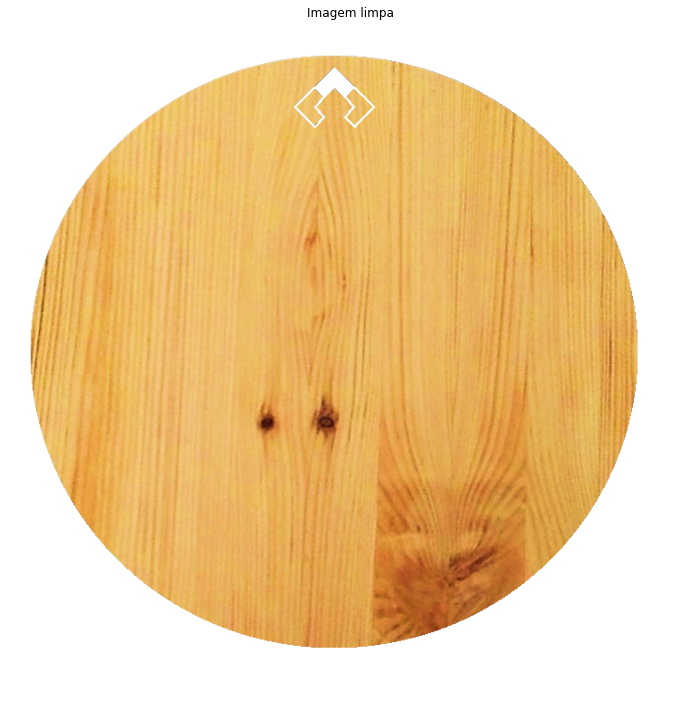

In [ ]:
#Remove caracteriscas não desejadas
img_Limpa = np.zeros((h,w,c),dtype = "uint8")
for i in range(h):
    for j in range (w):
        if img_masc_RGB[i,j,0]==255 and img_masc_RGB[i,j,1] ==255 and img_masc_RGB[i,j,2]== 255:
            img_Limpa[i,j]=[255,255,255]
        else:
            img_Limpa[i,j] = img_madeira_RGB[i,j]

plt.figure(figsize=(15,10)) 
plt.imshow(img_Limpa, cmap='gray')
plt.title('Imagem limpa')
plt.axis('off')
plt.tight_layout()
plt.show()

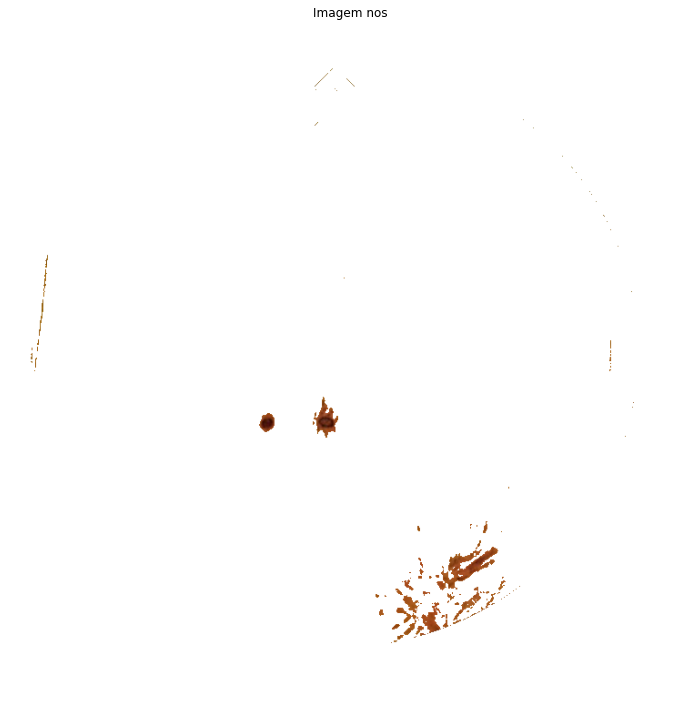

In [ ]:
img_Nós = np.zeros((h,w,c),dtype = "uint8")
Madeira =0
Branco =0

for i in range(h):
    for j in range (w):
        if img_Limpa[i,j,0]==255 and img_Limpa[i,j,1] ==255 and img_Limpa[i,j,2]== 255:
            Branco+=1
        else:
            Madeira+=1

for i in range(h):
    for j in range (w):
        if img_Limpa[i,j,0]<175 and img_Limpa[i,j,1] <175 and img_Limpa[i,j,2]<175:
            img_Nós[i,j] = img_Limpa[i,j]
        else:
            img_Nós[i,j] = [255,255,255]

plt.figure(figsize=(15,10)) 
plt.imshow(img_Nós, cmap='gray')
plt.title('Imagem nos')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
Nós = 0
Branco2 = 0
for i in range(h):
    for j in range (w):
        if img_Nós[i,j,0]==255 and img_Nós[i,j,1] ==255 and img_Nós[i,j,2]== 255:
            Branco2+=1
        else:
            Nós+=1

print((Nós/Madeira)*100)

1.1283733815398702


# Questão 2
### Processamento digital

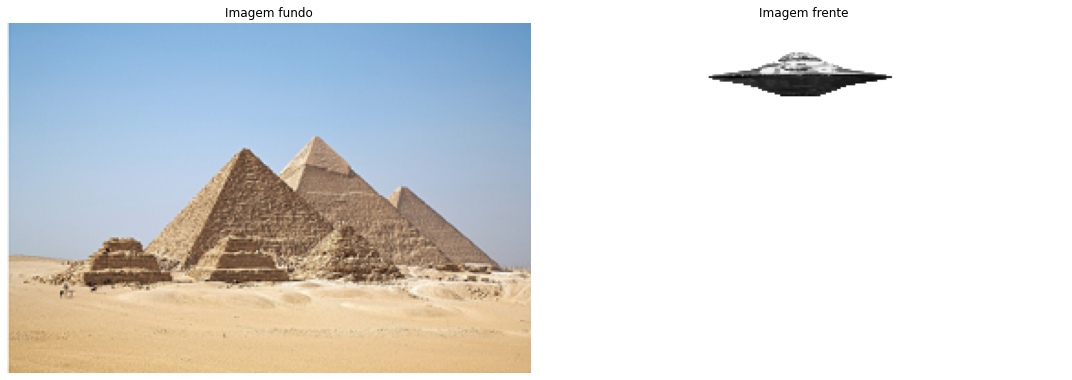

In [ ]:
img_fundo = cv2.imread("Figuras_APS1/Fig_APS1_2a.bmp", cv2.IMREAD_COLOR)
img_frente = cv2.imread("Figuras_APS1/Fig_APS1_2b.bmp", cv2.IMREAD_GRAYSCALE)
img_fundo_rgb = cv2.cvtColor(img_fundo,cv2.COLOR_BGR2RGB)

(h,w,c)= img_fundo.shape

plt.figure(figsize=(15,10)) 
plt.subplot(1,2,1)
plt.imshow(img_fundo_rgb, cmap='gray')
plt.title('Imagem fundo')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_frente, cmap='gray')
plt.title('Imagem frente')
plt.axis('off')
plt.tight_layout()
plt.show()

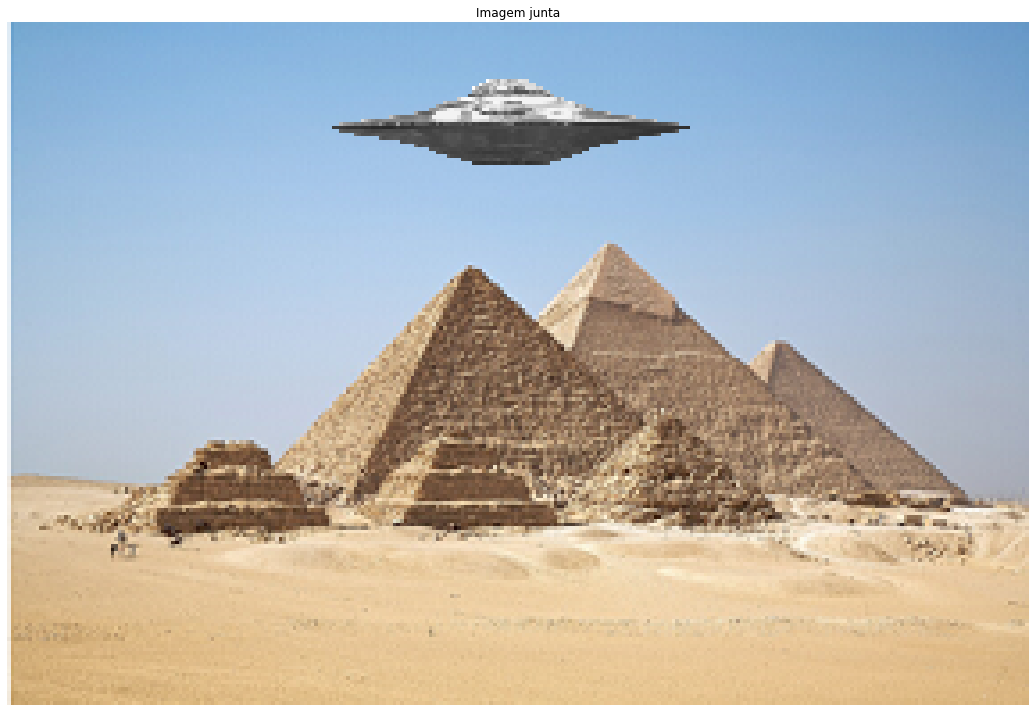

In [ ]:
img_Junta = np.zeros((h,w,c),dtype = "uint8")

for i in range(h):
    for j in range (w):
        if img_frente[i,j] ==255:
            img_Junta[i,j] = img_fundo_rgb[i,j]
        else:
            img_Junta[i,j] = img_frente[i,j]

plt.figure(figsize=(15,10)) 
plt.imshow(img_Junta, cmap='gray')
plt.title('Imagem junta')
plt.axis('off')
plt.tight_layout()
plt.show()

# Questão 4
### Correção de iluminação

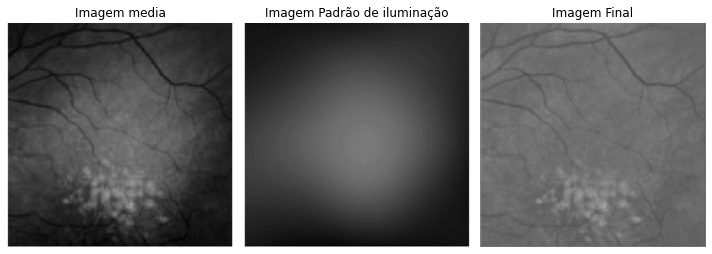

In [ ]:
img_medica = cv2.imread("Figuras_APS1/Fig_APS1_4a.bmp", cv2.IMREAD_GRAYSCALE)
img_padrao = cv2.imread("Figuras_APS1/Fig_APS1_4b.bmp", cv2.IMREAD_GRAYSCALE)

(h,w)= img_medica.shape
img_Final = np.zeros((h,w,c),dtype = "uint8")
img_Final_32= img_Final.astype(np.float32)
Media = np.mean(img_padrao)
for i in range(h):
    for j in range (w):
        img_Final_32[i,j]=img_medica[i,j]*(Media/img_padrao[i,j])

img_Final=np.clip(img_Final_32,0,255).astype(np.uint8)

plt.figure(figsize=(10,7)) 

plt.subplot(1,3,1)
plt.imshow(img_medica, cmap='gray')
plt.title('Imagem media')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_padrao, cmap='gray')
plt.title('Imagem Padrão de iluminação')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_Final, cmap='gray',vmin=0,vmax=255)
plt.title('Imagem Final')
plt.axis('off')

plt.tight_layout()
plt.show()
